In [2]:
#Import Pandas and read csv into a DataFrame

import pandas as pd
data = pd.read_csv('data/VT-clean.csv')
df = pd.DataFrame(data)

df.info()

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283285 entries, 0 to 283284
Data columns (total 23 columns):
id                       283285 non-null object
state                    283285 non-null object
stop_date                283285 non-null object
stop_time                283285 non-null object
location_raw             282591 non-null object
county_name              282580 non-null object
county_fips              282580 non-null float64
fine_grained_location    282938 non-null object
police_department        283285 non-null object
driver_gender            281573 non-null object
driver_age_raw           282114 non-null float64
driver_age               281999 non-null float64
driver_race_raw          279301 non-null object
driver_race              278468 non-null object
violation_raw            281107 non-null object
violation                281107 non-null object
search_conducted         283285 non-null bool
search_type_raw          281045 non-null object
search_type             

In [3]:
#Filter 2015 Traffic data based on year in the stop_date column
traffic_2015 = df.loc[pd.to_datetime(df['stop_date']).dt.year == 2015]
traffic_2015.to_csv('data/VT_2015.csv')

In [4]:
traffic_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45662 entries, 237623 to 283284
Data columns (total 23 columns):
id                       45662 non-null object
state                    45662 non-null object
stop_date                45662 non-null object
stop_time                45662 non-null object
location_raw             45634 non-null object
county_name              45631 non-null object
county_fips              45631 non-null float64
fine_grained_location    45623 non-null object
police_department        45662 non-null object
driver_gender            45440 non-null object
driver_age_raw           45143 non-null float64
driver_age               45119 non-null float64
driver_race_raw          44984 non-null object
driver_race              44745 non-null object
violation_raw            45479 non-null object
violation                45479 non-null object
search_conducted         45662 non-null bool
search_type_raw          45470 non-null object
search_type              591 non-null 

In [5]:
#check if there are any duplicates
traffic_2015[traffic_2015.duplicated(['id'])]

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id


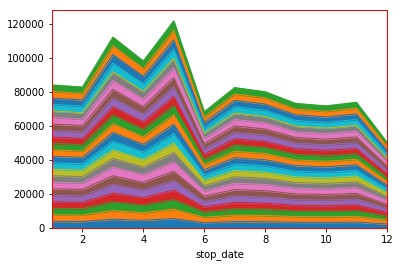

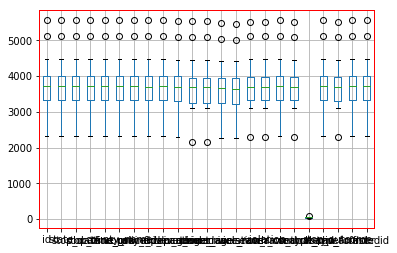

In [509]:
#check monthly total counts and use it to draw area plot and Box plot
monthly_traffic = traffic_2015.groupby(pd.to_datetime(traffic_2015['stop_date']).dt.month).count()
monthly_traffic.plot.area(legend = False )
import matplotlib.pyplot as plt
plt.show()
monthly_traffic.boxplot()
plt.show()

In [120]:
#Drop records with null value of columns 'violation', 'stop_outcome' . these records with null value doesnt yeild any 
# meanigful value for further analysis.

VT_traf_2015_main = traffic_2015.dropna(subset = ['violation', 'stop_outcome'])
VT_traf_2015_main.loc['driver_race'] = VT_traf_2015_main['driver_race'].fillna('Other')

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
print(VT_traf_2015_main)

                   id state   stop_date stop_time    location_raw  \
237623  VT-2015-00001    VT  2015-01-01     00:00           Derby   
237624  VT-2015-00002    VT  2015-01-01     00:20       New Haven   
237625  VT-2015-00003    VT  2015-01-01     00:20        Hartford   
237626  VT-2015-00004    VT  2015-01-01     00:30       New Haven   
237627  VT-2015-00005    VT  2015-01-01     00:34        Hartford   
237628  VT-2015-00006    VT  2015-01-01     00:35     Bridgewater   
237629  VT-2015-00007    VT  2015-01-01     00:45     Lyndonville   
237630  VT-2015-00008    VT  2015-01-01     00:50        Hartford   
237632  VT-2015-00010    VT  2015-01-01     00:52          Bethel   
237633  VT-2015-00011    VT  2015-01-01     00:53     Bridgewater   
237634  VT-2015-00012    VT  2015-01-01     00:55       New Haven   
237635  VT-2015-00013    VT  2015-01-01     00:57        Hartford   
237636  VT-2015-00014    VT  2015-01-01     01:00        Hartford   
237637  VT-2015-00015    VT  2015-

In [121]:
#Import Numphy pacjage and aggregate data based on varios columns like gender, age, date, time etc
import numpy as np
VT_agg_age = pd.pivot_table(VT_traf_2015_main, values='id', index=['driver_age'], columns=['driver_gender'], 
                            aggfunc=np.count_nonzero)
#VT_agg_age = pd.pivot_table(VT_traf_2015_main, values='id', index=np.floor_divide(VT_traf_2015_main['driver_age'], 5), columns=['driver_gender'], aggfunc=np.count_nonzero)
print(VT_agg_age)

driver_gender      F      M
driver_age                 
15.0             5.0    6.0
16.0            56.0   83.0
17.0           201.0  339.0
18.0           326.0  608.0
19.0           453.0  890.0
20.0           496.0  894.0
21.0           504.0  940.0
22.0           567.0  854.0
23.0           543.0  891.0
24.0           556.0  916.0
25.0           509.0  854.0
26.0           448.0  830.0
27.0           465.0  758.0
28.0           472.0  739.0
29.0           420.0  715.0
30.0           421.0  659.0
31.0           420.0  615.0
32.0           354.0  607.0
33.0           325.0  574.0
34.0           305.0  581.0
35.0           313.0  554.0
36.0           305.0  507.0
37.0           278.0  456.0
38.0           288.0  487.0
39.0           284.0  454.0
40.0           264.0  500.0
41.0           284.0  448.0
42.0           262.0  463.0
43.0           230.0  463.0
44.0           271.0  491.0
...              ...    ...
66.0           111.0  208.0
67.0           100.0  212.0
68.0           111.0

In [122]:
VT_agg_month = pd.pivot_table(VT_traf_2015_main, values='id', index=[pd.to_datetime(VT_traf_2015_main['stop_date'])
                                                                     .dt.month], columns=['driver_gender'], aggfunc=np.count_nonzero)
print(VT_agg_month)

driver_gender     F     M
stop_date                
1.0            1334  2465
2.0            1240  2509
3.0            1809  3265
4.0            1639  2793
5.0            2094  3404
6.0            1113  1977
7.0            1391  2345
8.0            1304  2318
9.0            1219  2096
10.0           1210  2030
11.0           1250  2105
12.0            794  1504


In [123]:
VT_agg_time = pd.pivot_table(VT_traf_2015_main, values='id', index=pd.to_datetime(VT_traf_2015_main['stop_time'])
                             .dt.hour, columns=['driver_gender'], aggfunc=np.count_nonzero)
print(VT_agg_time)

driver_gender     F     M
stop_time                
0.0             504  1151
1.0             278   737
2.0             118   376
3.0              27   105
4.0               9    46
5.0              20    81
6.0              97   195
7.0             475   659
8.0             856  1229
9.0             886  1485
10.0            798  1238
11.0            606   948
12.0            448   812
13.0            697  1195
14.0            990  1705
15.0           1171  1916
16.0           1124  1875
17.0           1771  2909
18.0           1861  3132
19.0           1089  1943
20.0            626  1173
21.0            631  1203
22.0            683  1327
23.0            632  1371


driver_gender     F     M
stop_date                
0.0            2423  3803
1.0            2238  3665
2.0            2379  4009
3.0            2308  4017
4.0            2823  5094
5.0            2271  4449
6.0            1955  3774


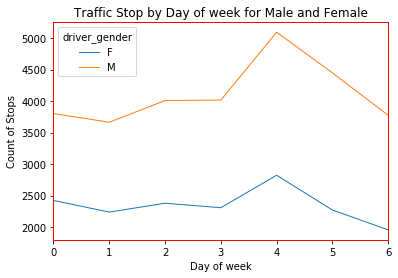

In [449]:
VT_agg_day = pd.pivot_table(VT_traf_2015_main, values='id', index=pd.to_datetime(VT_traf_2015_main['stop_date']).
                            dt.dayofweek, columns=['driver_gender'], aggfunc=np.count_nonzero)
print(VT_agg_day)
VT_agg_day.plot(kind='line', legend = 'Driver gender')
plt.xlabel('Day of week')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by Day of week for Male and Female')
plt.show()

In [125]:
female_monthly_averages = VT_agg_month.aggregate({"F":np.mean})
male_monthly_averages = VT_agg_month.aggregate({"M":np.mean})
print('Number of average monthly stop for Male are:', np.around(male_monthly_averages['M'], decimals=-1),
      ' and Number of average monthly stop for Female are: ' ,np.around(female_monthly_averages['F'], decimals=-1))

Number of average monthly stop for Male are: 2400.0  and Number of average monthly stop for Female are:  1370.0


In [126]:
VT_agg_date = pd.pivot_table(VT_traf_2015_main, values='id', index=pd.to_datetime(VT_traf_2015_main['stop_date'])
                             ,columns=['driver_gender'], aggfunc=np.count_nonzero)
weekday_averages = VT_agg_date.aggregate({np.mean})
print('Number of average Daily stop for Male are: ', np.around(weekday_averages['M']['mean'], decimals=0),
      ' and same Number of Female is: ' ,np.around(weekday_averages['F']['mean'], decimals=0))

Number of average Daily stop for Male are:  79.0  and same Number of Female is:  45.0


In [148]:
VT_agg_hour = pd.pivot_table(VT_traf_2015_main, values='id', 
                             index=[pd.to_datetime(VT_traf_2015_main['stop_date']), 
                            pd.to_datetime(VT_traf_2015_main['stop_time']).dt.hour], 
                             columns=['driver_gender'], aggfunc=np.count_nonzero)
hourly_averages = VT_agg_hour.aggregate({np.mean})

print('Approx Number of average stop per hour for Male are: ', np.around(hourly_averages['M']['mean'], decimals=0),
      ' and same Number of Female is: ' ,np.around(hourly_averages['F']['mean'], decimals=0))

Approx Number of average stop per hour for Male are:  4.0  and same Number of Female is:  3.0


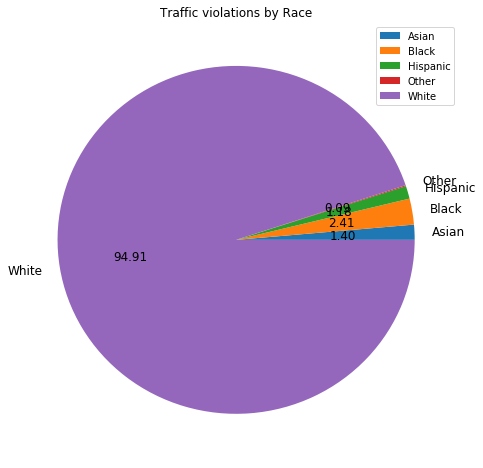

In [435]:
VT_race_gender = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['driver_race'], columns=['driver_gender'], aggfunc=np.count_nonzero)  
total = VT_race_gender.apply(np.sum)
VT_race_gender['M%'] = np.around((VT_race_gender['M'] / total['M'])* 100, decimals=2) 
VT_race_gender['F%'] = np.around((VT_race_gender['F'] / total['F'])* 100, decimals=2)
VT_race_gender['total'] = (VT_race_gender['F'] + VT_race_gender['M'])
VT_race_gender['total'].plot.pie(figsize=(8, 8), label = '', fontsize=12, autopct='%.2f', legend=True)
plt.title('Traffic violations by Race')
plt.show()

In [131]:
# %Traffic stops by Arrest 
VT_arrest_gender = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['is_arrested'], columns=['driver_gender'], aggfunc=np.count_nonzero) 
total = VT_arrest_gender.apply(np.sum)
VT_arrest_gender['M%'] = np.around((VT_arrest_gender['M'] / total['M'])* 100, decimals=2) 
VT_arrest_gender['F%'] = np.around((VT_arrest_gender['F'] / total['F'])* 100, decimals=2) 
print(VT_arrest_gender)

driver_gender      F      M     M%     F%
is_arrested                              
0.0            16276  28426  98.66  99.26
1.0              121    385   1.34   0.74


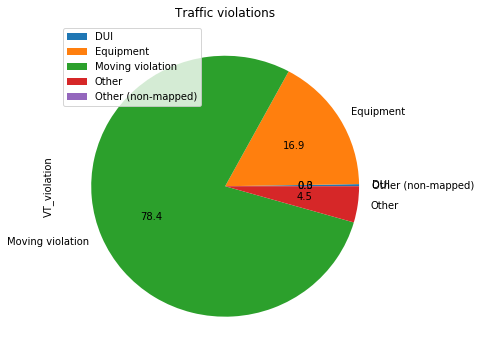

In [425]:
#show the ratio of different type of violation
VT_violation = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['violation'], aggfunc=np.count_nonzero)
VT_violation['id'].plot.pie(figsize=(6, 6), label = '', fontsize=10, autopct='%.1f', legend=True, mark_right=True)
plt.title('Traffic violations')
plt.show()

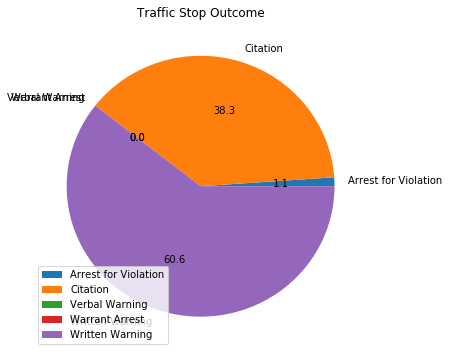

In [505]:
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
VT_stop_outcome = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['stop_outcome'], aggfunc=np.count_nonzero)
VT_stop_outcome['id'].plot.pie(figsize=(6, 6), label = '', fontsize=10, autopct='%.1f', legend=True)
plt.title('Traffic Stop Outcome')
plt.show()

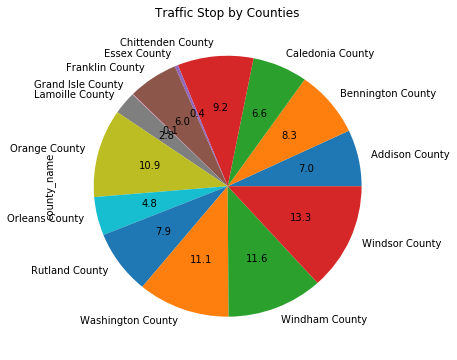

In [430]:
VT_county_name = pd.pivot_table(VT_traf_2015_main, values='id', 
                index=VT_traf_2015_main['county_name'], aggfunc=np.count_nonzero)
VT_county_name['id'].plot.pie(figsize=(6, 6), label = 'county_name', fontsize=10, autopct='%.1f')
plt.plot.legend=True
plt.title('Traffic Stop by Counties')
plt.show()

In [147]:
# Top 5 hours of the day for traffic stops
VT_top_time_M = pd.DataFrame(VT_agg_time.nlargest(5, 'M'))
VT_top_time_F = pd.DataFrame(VT_agg_time.nlargest(5, 'F'))
print('The most common time for traffic pullover for man is \n', VT_top_time_M['M'], '\n', VT_top_time_F['F'])

The most common time for traffic pullover for man is 
 stop_time
18.0    3132
17.0    2909
19.0    1943
15.0    1916
16.0    1875
Name: M, dtype: int64 
 stop_time
18.0    1861
17.0    1771
15.0    1171
16.0    1124
19.0    1089
Name: F, dtype: int64


In [152]:
# Top 5 hours of the day. Weekend has an increase or decrease in traffic stops?
VT_agg_hour_day = pd.pivot_table(VT_traf_2015_main, values='id', 
                             index=[pd.to_datetime(VT_traf_2015_main['stop_date']).dt.dayofweek, 
                            pd.to_datetime(VT_traf_2015_main['stop_time']).dt.hour], 
                             columns=['driver_gender'], aggfunc=np.count_nonzero)
VT_top_daytime_M = pd.DataFrame(VT_agg_hour_day.nlargest(5, 'M'))
VT_top_daytime_F = pd.DataFrame(VT_agg_hour_day.nlargest(5, 'F'))
print('The most common time for traffic pullover for man is \n', VT_top_daytime_M['M'], '\n', VT_top_daytime_F['F'])


The most common time for traffic pullover for man is 
 stop_date  stop_time
4.0        18.0         564.0
           17.0         478.0
0.0        18.0         457.0
2.0        18.0         444.0
3.0        18.0         436.0
Name: M, dtype: float64 
 stop_date  stop_time
4.0        17.0         321.0
0.0        18.0         307.0
4.0        18.0         305.0
0.0        17.0         283.0
1.0        18.0         282.0
Name: F, dtype: float64


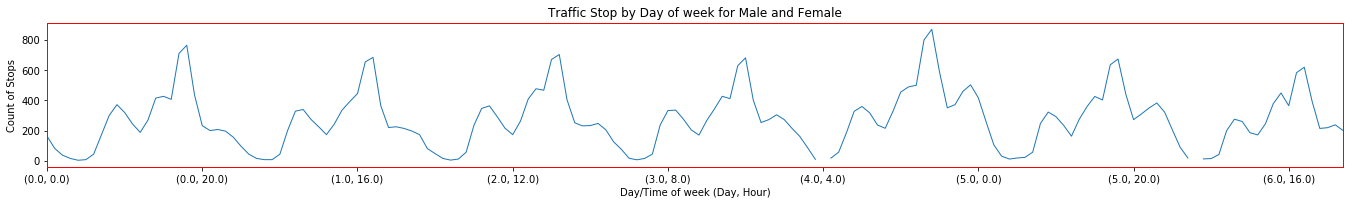

In [461]:
VT_agg_hour_day['total'] = (VT_agg_hour_day['F'] + VT_agg_hour_day['M'])
plt.axes([0, 0, 3, .5])
VT_agg_hour_day['total'].plot(kind='line', legend = False, )
plt.xlabel('Day/Time of week (Day, Hour)')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by Day of week for Male and Female')
plt.show()

In [154]:
# Top 5 hours of the day for traffic stops
VT_top_age_M = pd.DataFrame(VT_agg_age.nlargest(5, 'M'))
VT_top_age_F = pd.DataFrame(VT_agg_age.nlargest(5, 'F'))
print('The most common age of driver for traffic pullover for man is \n',
      VT_top_age_M['M'], '\n and for female it is \n', VT_top_age_F['F'])

The most common age of driver for traffic pullover for man is 
 driver_age
21.0    940.0
24.0    916.0
20.0    894.0
23.0    891.0
19.0    890.0
Name: M, dtype: float64 
 and for female it is 
 driver_age
22.0    567.0
24.0    556.0
23.0    543.0
25.0    509.0
21.0    504.0
Name: F, dtype: float64


In [166]:
VT_agg_cause = pd.pivot_table(VT_traf_2015_main, values='id', index=VT_traf_2015_main['violation'], 
                              columns=['driver_gender'], aggfunc=np.count_nonzero)
print(VT_agg_cause.sort_values(('M'), ascending=[0]))

driver_gender             F        M
violation                           
Moving violation    12851.0  22610.0
Equipment            2808.0   4809.0
Other                 700.0   1312.0
DUI                    38.0     79.0
Other (non-mapped)      NaN      1.0


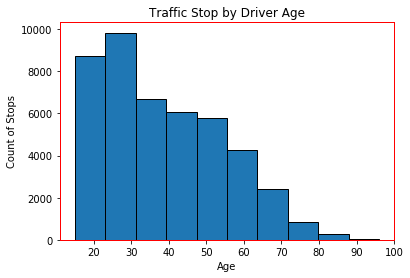

In [442]:
#Histogram of age ranges 
VT_traf_2015_main['driver_age'].plot('hist', edgecolor="k", label = '', legend=False)
plt.xlabel('Age')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by Driver Age')
plt.show()

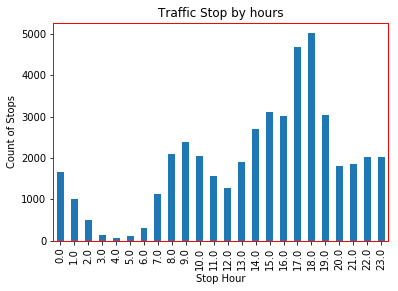

In [439]:
#bar plot of stop time hour 
newdf = VT_traf_2015_main[['stop_time']].groupby(pd.to_datetime(VT_traf_2015_main['stop_time'])
                             .dt.hour).count()
newdf.plot(kind='bar', label = '', legend=False)
plt.xlabel('Stop Hour')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by hours')
plt.show()

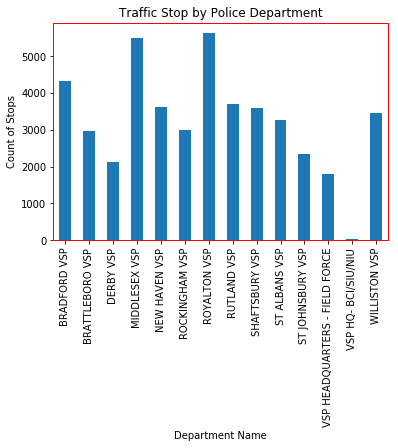

In [440]:
#bar plot of stop time hour 
newdf = VT_traf_2015_main[['police_department']].groupby(VT_traf_2015_main['police_department']).count()
newdf.plot(kind='bar', label = '', legend=False)
print()
plt.xlabel('Department Name')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by Police Department')
plt.show()

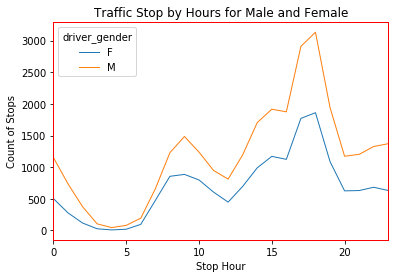

In [444]:
VT_agg_time.plot(kind='line', label = 'Driver gender')
plt.xlabel('Stop Hour')
plt.ylabel('Count of Stops')
plt.title('Traffic Stop by Hours for Male and Female')
plt.show()

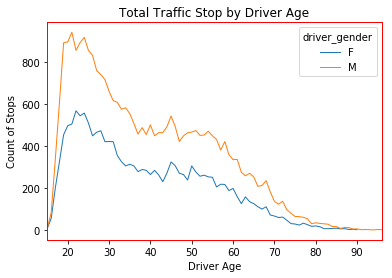

In [467]:
#Compare with trend chart of Male V/s female and Driver age
VT_agg_age.plot(kind='line')
plt.title('Traffic Stop by Hours for Male and Female')
plt.xlabel('Driver Age')
plt.ylabel('Count of Stops')
plt.show()

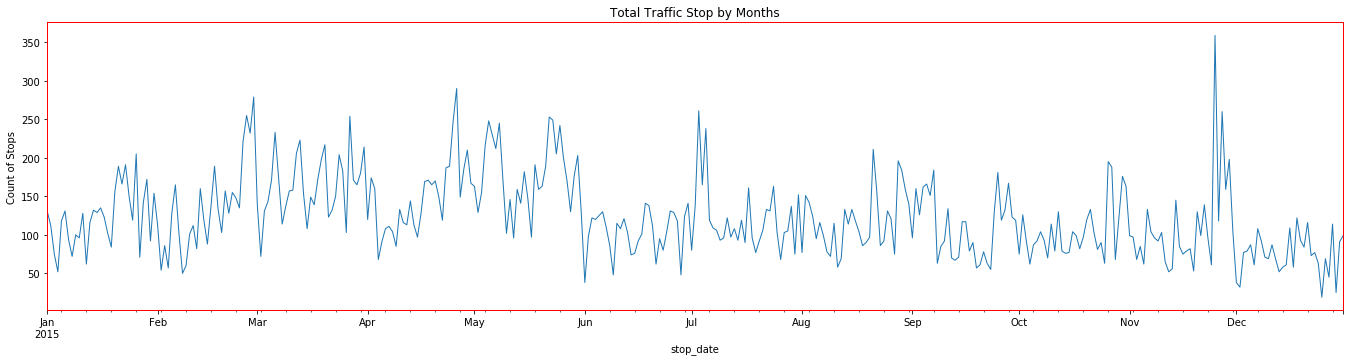

In [466]:
VT_agg_date = pd.pivot_table(VT_traf_2015_main, values='id', index=[pd.to_datetime(VT_traf_2015_main['stop_date'])],
                             columns=['driver_gender'], aggfunc=np.count_nonzero)
VT_agg_date['total'] = (VT_agg_date['F'] + VT_agg_date['M'])
ts = pd.Series(VT_agg_date['total'])
plt.axes([0, 0, 3, 1])
plt.xlabel('Month of the Year 2015')
plt.ylabel('Count of Stops')
plt.title('Total Traffic Stop by Months')
ts.plot(label = '', legend=False)
plt.show()

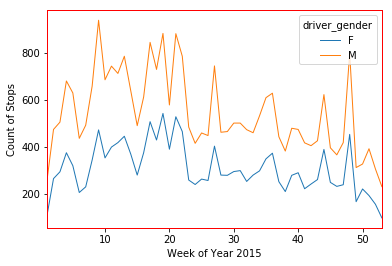

In [274]:
#Compare with trend chart of Male V/s female and time of the year (week)
VT_agg_week = pd.pivot_table(VT_traf_2015_main, values='id', index=[pd.to_datetime(VT_traf_2015_main['stop_date']).dt.week],
                             columns=['driver_gender'], aggfunc=np.count_nonzero)
VT_agg_week.plot(kind='line')
plt.xlabel('Week of Year 2015')
plt.ylabel('Count of Stops')
plt.show()

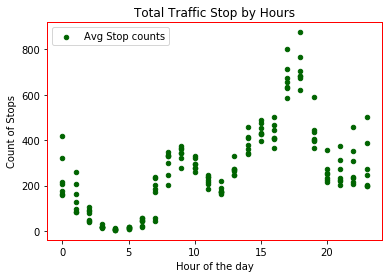

In [491]:
# add couple of new calculcated column to the original Data Frame
VT_traf_2015_main.is_copy = False
VT_traf_2015_main.loc['hour'] = pd.to_datetime(VT_traf_2015_main['stop_time']).dt.hour
VT_traf_2015_main.loc['dayofweek'] = pd.to_datetime(VT_traf_2015_main['stop_date']).dt.dayofweek
VT_traf_2015_main.set_index(['hour', 'dayofweek'], append=True)

# create a new aggregated dataframe with new calculcated column and dra scatter plot
newdf2 = VT_traf_2015_main.groupby(['hour','dayofweek']).id.count().reset_index()
newdf2.plot.scatter(x='hour', y='id', color='DarkGreen', label='Avg Stop counts');
plt.xlabel('Hour of the day')
plt.ylabel('Count of Stops')
plt.title('Total Traffic Stop by Hours')
plt.show()

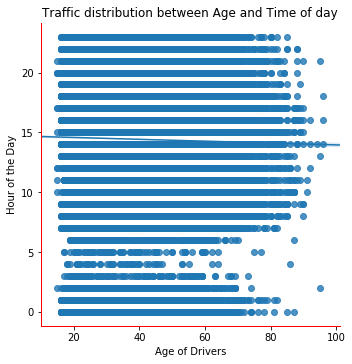

In [503]:
import seaborn as sns
sns.lmplot(x= 'driver_age', y= 'hour', data=VT_traf_2015_main)
plt.xlabel('Age of Drivers')
plt.ylabel('Hour of the Day')
plt.title('Traffic distribution between Age and Time of day')
plt.show()
